In [ ]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
# from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('seaborn-v0_8')  # or 'default', 'ggplot', 'bmh', etc.


In [2]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [3]:
#Function to calculate the cost (you can see the cost function in the cost-func.ipynb)
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

compute_gradient

In [ ]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameter w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """

    # Number of training examples (length of x)
    m = x.shape[0]    

    # Initialize gradients for w and b
    dj_dw = 0
    dj_db = 0
    
    # Loop over each training example
    for i in range(m):  
        # Compute the model prediction for example i: f_wb = w*x + b
        f_wb = w * x[i] + b 

        # Contribution of example i to gradient w.r.t w (calculate the derivative of the cost function with respect to w)
        dj_dw_i = (f_wb - y[i]) * x[i] 

        # Contribution of example i to gradient w.r.t b (calculate the derivative of the cost function with respect to b)   
        dj_db_i = f_wb - y[i] 

        # Accumulate the contributions into total gradients
        dj_db += dj_db_i
        dj_dw += dj_dw_i 

    # Average the gradients over all training examples
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    # Return the gradients
    return dj_dw, dj_db

In [5]:
def plt_gradients(x_train, y_train, compute_cost, compute_gradient):
    """
    Plots the cost function and gradients for linear regression
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Left plot: Cost vs w with gradient
    w_range = np.linspace(0, 400, 100)
    b_fixed = 100
    costs = [compute_cost(x_train, y_train, w, b_fixed) for w in w_range]
    
    ax1.plot(w_range, costs, 'lightblue', linewidth=2, label='Cost function')
    ax1.set_xlabel('w')
    ax1.set_ylabel('Cost')
    ax1.set_title('Cost vs w, with gradient; b set to 100')
    ax1.grid(True, alpha=0.3)
    
    # Add gradient points and tangent lines
    w_points = [100, 200, 300]
    colors = ['blue', 'green', 'red']
    
    for i, w_val in enumerate(w_points):
        cost_val = compute_cost(x_train, y_train, w_val, b_fixed)
        dj_dw, dj_db = compute_gradient(x_train, y_train, w_val, b_fixed)
        
        # Plot point
        ax1.plot(w_val, cost_val, 'o', color=colors[i], markersize=8)
        
        # Plot tangent line (gradient)
        w_tangent = np.linspace(w_val - 50, w_val + 50, 10)
        cost_tangent = cost_val + dj_dw * (w_tangent - w_val)
        ax1.plot(w_tangent, cost_tangent, '--', color='red', alpha=0.7, linewidth=2)
        
        # Add gradient annotation
        ax1.annotate(f'∂J/∂w = {dj_dw:.0f}', 
                    xy=(w_val, cost_val), 
                    xytext=(10, 20), 
                    textcoords='offset points',
                    fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # Right plot: Quiver plot of gradients
    w_range_2d = np.linspace(-100, 600, 20)
    b_range_2d = np.linspace(-200, 200, 20)
    W, B = np.meshgrid(w_range_2d, b_range_2d)
    
    # Calculate gradients at each point
    dj_dw_grid = np.zeros_like(W)
    dj_db_grid = np.zeros_like(B)
    
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            dj_dw_grid[i, j], dj_db_grid[i, j] = compute_gradient(x_train, y_train, W[i, j], B[i, j])
    
    # Create quiver plot
    ax2.quiver(W, B, -dj_dw_grid, -dj_db_grid, 
               np.sqrt(dj_dw_grid**2 + dj_db_grid**2), 
               cmap='viridis', alpha=0.7, scale=1000)
    ax2.set_xlabel('w')
    ax2.set_ylabel('b')
    ax2.set_title('Gradient shown in quiver plot')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


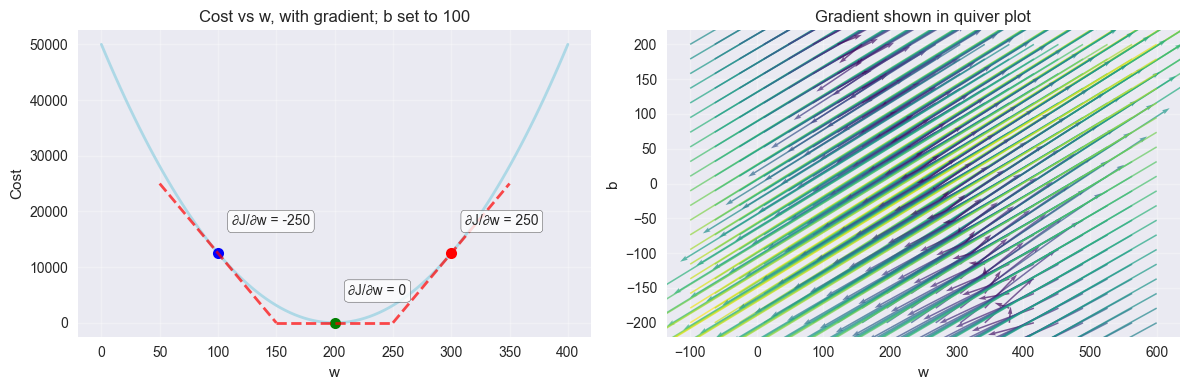

In [6]:
# Generate the gradient visualization plots
plt_gradients(x_train, y_train, compute_cost, compute_gradient)


Gradient Descent

With the gradients now defined, we can implement the gradient descent algorithm in the function gradient_descent. The implementation details are explained through the comments in the code. You will then use this function to learn the optimal values of w and 𝑏 from the training data.

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    
    # Initialize lists to store cost values and parameter history for visualization
    J_history = []   # List to store cost at each iteration
    p_history = []   # List to store [w, b] values at each iteration
    
    # Initialize parameters with input values
    b = b_in        # Current value of bias
    w = w_in        # Current value of weight
    
    # Loop over the number of iterations for gradient descent
    for i in range(num_iters):
        # Compute the gradient of cost with respect to w and b using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update bias parameter using gradient descent rule
        b = b - alpha * dj_db                            
        # Update weight parameter using gradient descent rule
        w = w - alpha * dj_dw                            

        # Store cost and parameters for graphing, avoid excessive memory usage
        if i < 100000:      
            J_history.append(cost_function(x, y, w , b))   # Compute and save current cost
            p_history.append([w, b])                        # Save current parameters
        
        # Print progress every 10% of total iterations
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    # Return final parameters and history of cost and parameters
    return w, b, J_history, p_history


In [12]:
import math
# Initialize model parameters to 0
w_init = 0  # initial weight
b_init = 0  # initial bias

# Set hyperparameters for gradient descent
iterations = 10000     # total number of gradient descent iterations
tmp_alpha = 1.0e-2     # learning rate (step size for each update)

# Run gradient descent on training data
# Pass in training features x_train, targets y_train, initial parameters, learning rate,
# number of iterations, and the functions to compute cost and gradient
w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha, 
    iterations, compute_cost, compute_gradient
)

# Print the final parameters found by gradient descent
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


he cost begins with a high value and quickly decreases at first. The gradients, dj_dw and dj_db, also start large and shrink over time—initially dropping quickly, then more gradually. As the process approaches the minimum, updates become smaller because the gradients themselves are smaller. Even though the learning rate alpha stays the same, the progress naturally slows as the parameters get closer to their optimal values.

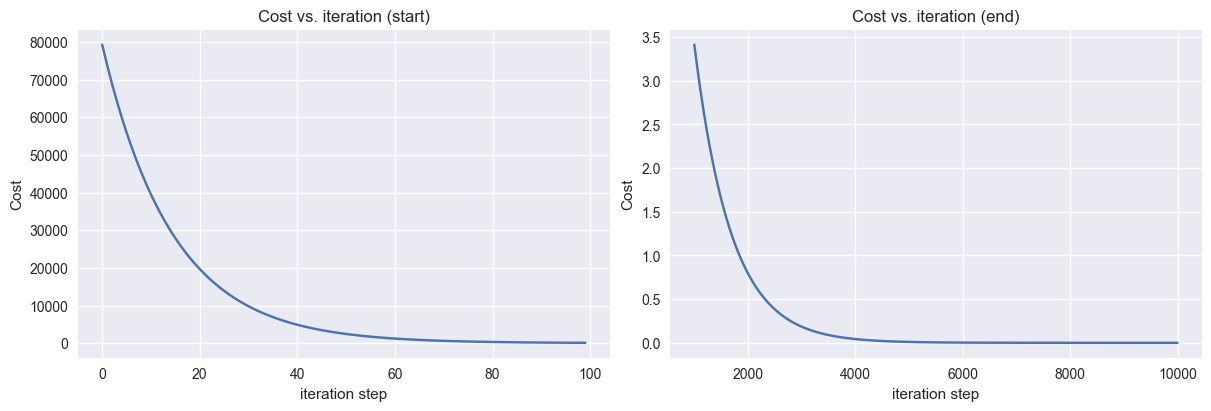

In [13]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])

ax1.set_title("Cost vs. iteration (start)");
ax2.set_title("Cost vs. iteration (end)")

ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')

ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')

plt.show()


Predictions
With the learned parameters 
w and 
𝑏, the model can predict housing values. The predictions closely match the training data, and new predictions are consistent with expected values.

In [14]:
print(f"1000 sqft house prediction is equal to {w_final*1.0 + b_final:0.1f} Thousand $")
print(f"1200 sqft house prediction is equal to {w_final*1.2 + b_final:0.1f} Thousand $")
print(f"2000 sqft house prediction is equal to {w_final*2.0 + b_final:0.1f} Thousand $")

1000 sqft house prediction is equal to 300.0 Thousand $
1200 sqft house prediction is equal to 340.0 Thousand $
2000 sqft house prediction is equal to 500.0 Thousand $


In [17]:
def plt_contour_wgrad(x_train, y_train, p_history, ax):
    """
    Plots the contour plot of cost function with gradient descent path
    """
    # Create a grid of w and b values
    w_range = np.linspace(-100, 400, 50)
    b_range = np.linspace(-400, 400, 50)
    W, B = np.meshgrid(w_range, b_range)
    
    # Calculate cost for each point in the grid
    Z = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            Z[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])
    
    # Create contour plot
    contour_levels = [1000, 5000, 10000, 25000, 50000]
    CS = ax.contour(W, B, Z, levels=contour_levels, colors=['darkred', 'magenta', 'purple', 'blue', 'orange'], linewidths=2)
    ax.clabel(CS, inline=True, fontsize=10, fmt='%d')
    
    # Plot gradient descent path
    if len(p_history) > 0:
        p_hist = np.array(p_history)
        w_path = p_hist[:, 0]
        b_path = p_hist[:, 1]
        
        # Plot the path with arrows
        ax.plot(w_path, b_path, 'r-', linewidth=3, alpha=0.8)
        
        # Add arrows to show direction
        for i in range(0, len(w_path)-1, max(1, len(w_path)//20)):
            dx = w_path[i+1] - w_path[i]
            dy = b_path[i+1] - b_path[i]
            ax.arrow(w_path[i], b_path[i], dx, dy, 
                    head_width=5, head_length=5, fc='red', ec='red', alpha=0.7)
        
        # Add cost annotations at key points
        if len(p_history) > 0:
            # First point
            cost_0 = compute_cost(x_train, y_train, w_path[0], b_path[0])
            ax.annotate(f'{cost_0:.0f}', xy=(w_path[0], b_path[0]), 
                       xytext=(10, 10), textcoords='offset points',
                       fontsize=10, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            
            # Middle point
            mid_idx = len(w_path) // 2
            cost_mid = compute_cost(x_train, y_train, w_path[mid_idx], b_path[mid_idx])
            ax.annotate(f'{cost_mid:.0f}', xy=(w_path[mid_idx], b_path[mid_idx]), 
                       xytext=(10, 10), textcoords='offset points',
                       fontsize=10, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            
            # Final point
            cost_final = compute_cost(x_train, y_train, w_path[-1], b_path[-1])
            ax.annotate(f'{cost_final:.0f}', xy=(w_path[-1], b_path[-1]), 
                       xytext=(10, 10), textcoords='offset points',
                       fontsize=10, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # Add reference lines to minimum
    ax.axvline(x=200, color='purple', linestyle=':', alpha=0.7)
    ax.axhline(y=100, color='purple', linestyle=':', alpha=0.7)
    
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_title('Contour plot of cost J(w,b), vs b,w with path of gradient descent')
    ax.grid(True, alpha=0.3)


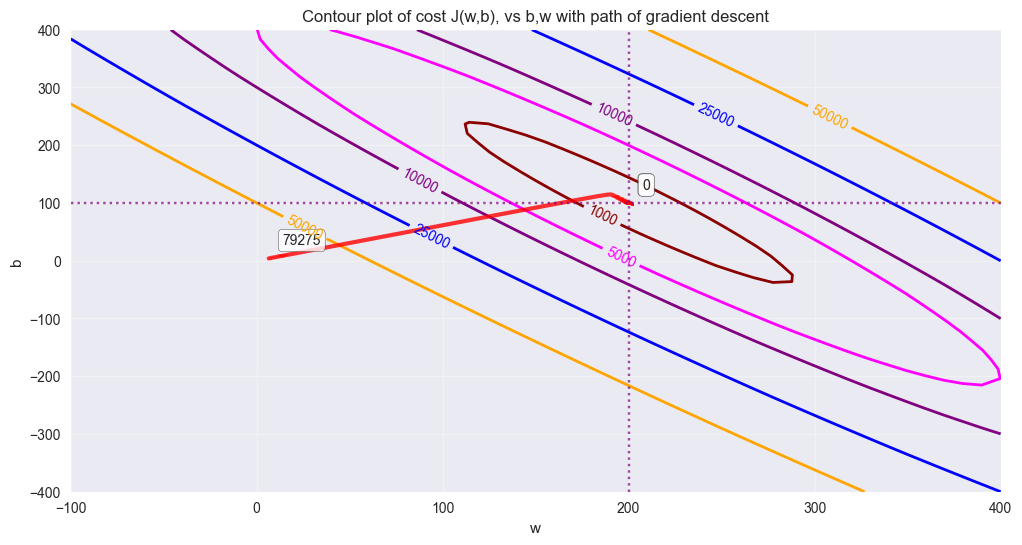

In [18]:
# Generate the contour plot with gradient descent path
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)
plt.show()
